In [39]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
# import torch
# import torch.nn as nn
# import torch.optim as optim

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# torch.manual_seed(42)


In [40]:

data = pd.read_csv('survey_results_public.csv')



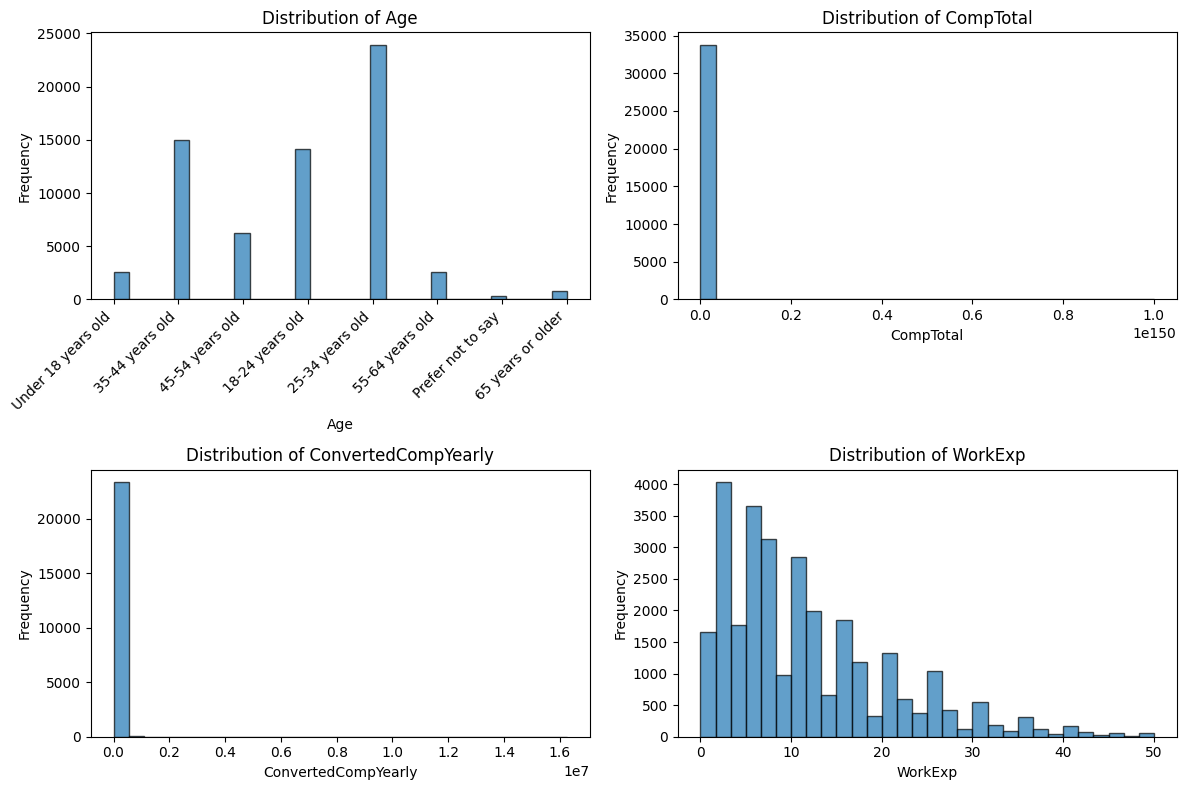

In [8]:
import matplotlib.pyplot as plt

# Plotting distributions of numerical columns
numerical_features = ['Age', 'CompTotal', 'ConvertedCompYearly', 'WorkExp']

# Adjusting the plot for better readability on the Age axis by rotating labels
plt.figure(figsize=(12, 8))


for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    plt.hist(data[feature].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    if feature == 'Age':  # Rotate x-axis labels for Age
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



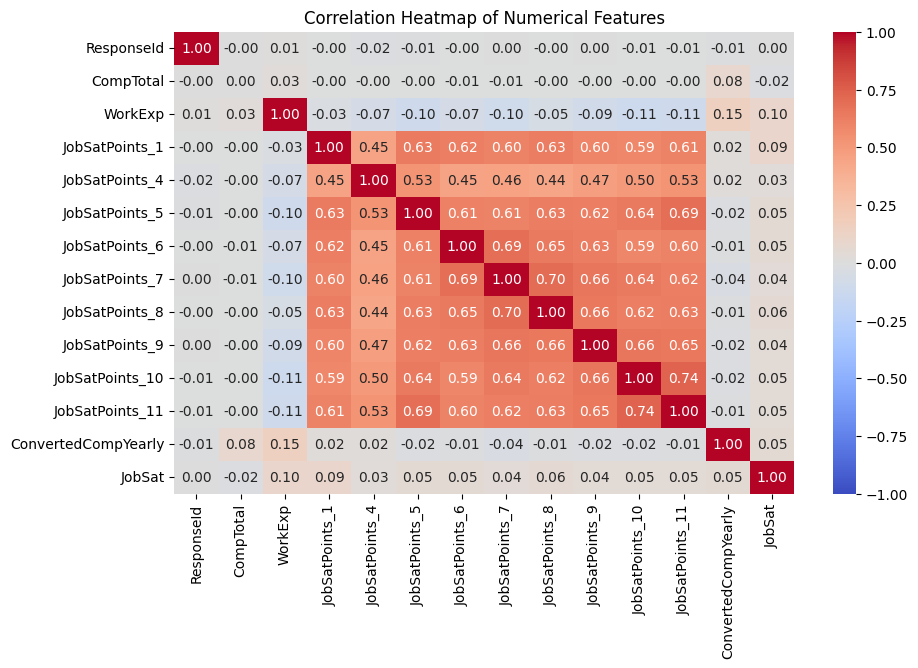

In [9]:
import seaborn as sns

# Perform correlation analysis for the numerical features
correlation_matrix = data.corr(numeric_only=True)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
plt.title("Correlation Heatmap of Numerical Features")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()


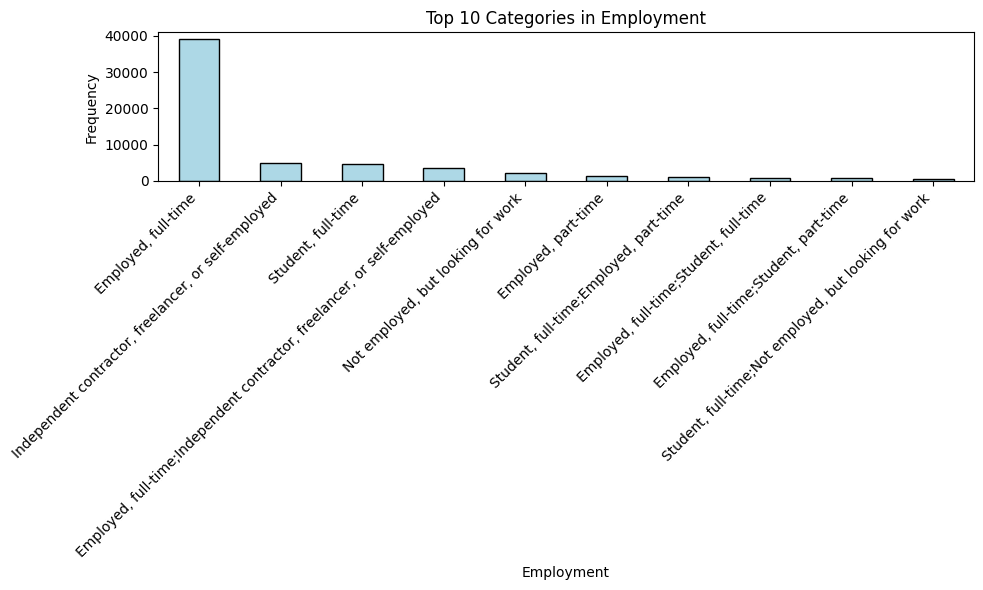

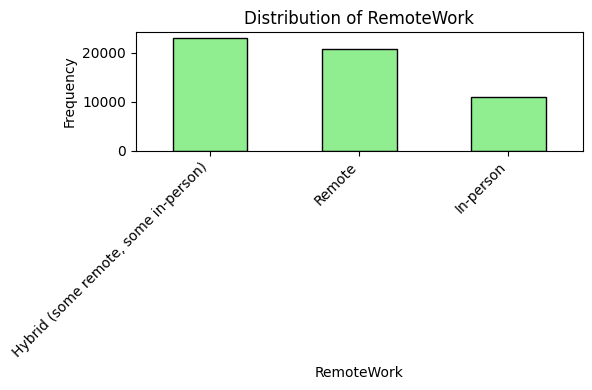

C:\Users\msn\AppData\Local\Temp\ipykernel_27300\4150249162.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


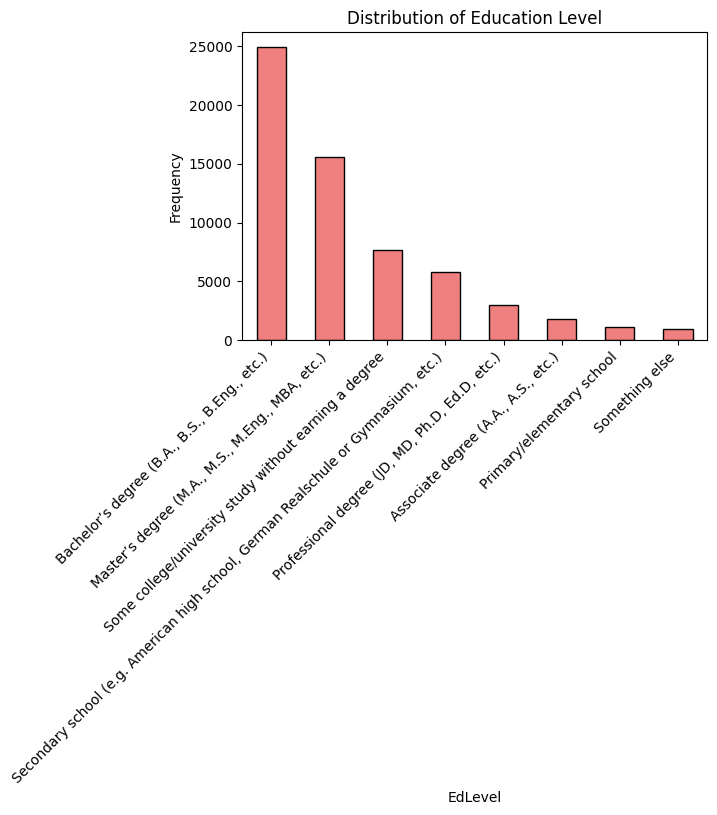

In [10]:
# Plotting each categorical feature one by one for better readability
# Employment distribution - Top 10 categories
plt.figure(figsize=(10, 6))
data['Employment'].value_counts().nlargest(10).plot(kind='bar', color='lightblue', edgecolor='k')
plt.title('Top 10 Categories in Employment')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plot RemoteWork distribution
plt.figure(figsize=(6, 4))
data['RemoteWork'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='k')
plt.title('Distribution of RemoteWork')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot EdLevel distribution
plt.figure(figsize=(6, 4))
data['EdLevel'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='k')
plt.title('Distribution of Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


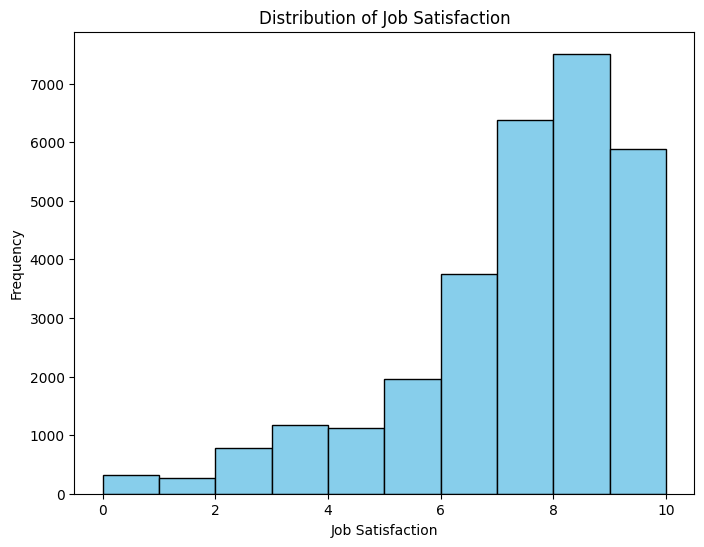

In [11]:
# Plot the distribution of JobSat (Job Satisfaction)
plt.figure(figsize=(8, 6))
data['JobSat'].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='k')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\615742496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Employment', y='JobSat', palette='Set3')


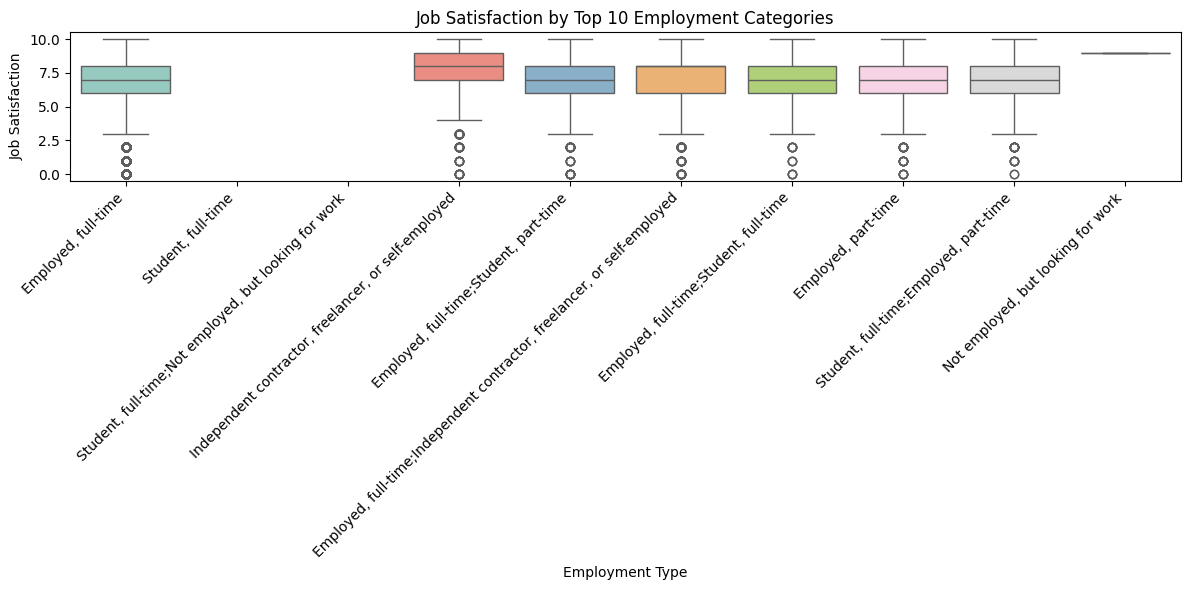

In [12]:
# Limiting the box plot to the top employment categories for better readability
top_employment_categories = data['Employment'].value_counts().nlargest(10).index

# Filter the dataset for only the top employment categories
filtered_data = data[data['Employment'].isin(top_employment_categories)]

# Plotting Job Satisfaction for top 10 employment categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Employment', y='JobSat', palette='Set3')
plt.title('Job Satisfaction by Top 10 Employment Categories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Employment Type')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\3613790986.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_edlevel, x='EdLevel', y='JobSat', palette='Set2')


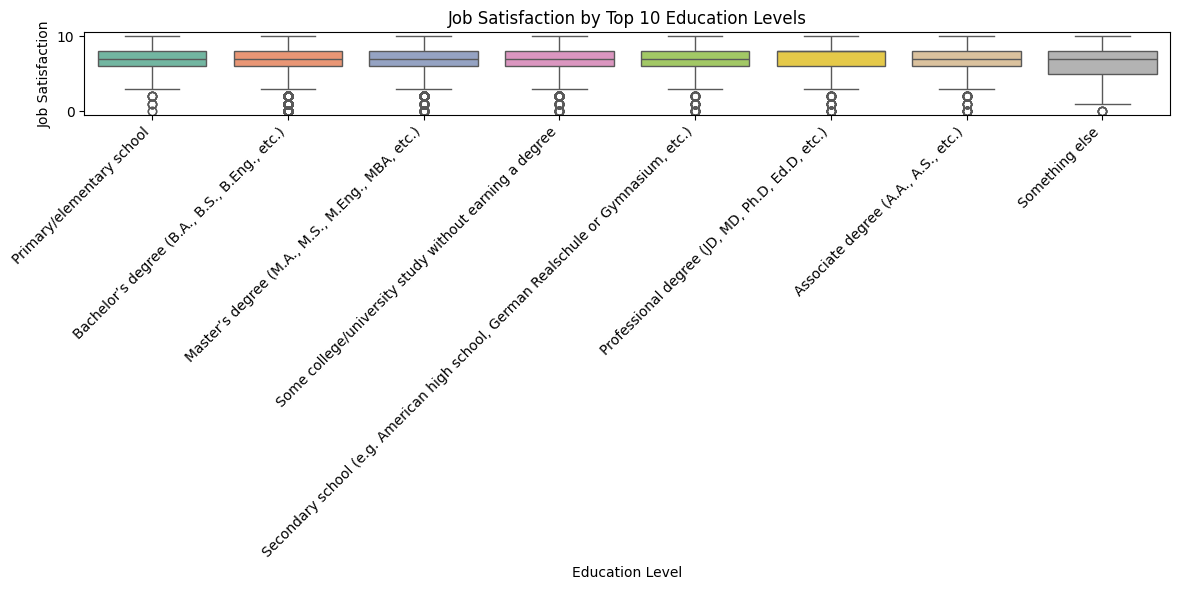

In [13]:
# Plotting Job Satisfaction by Education Level (EdLevel) using box plot
# Limiting to top 10 categories in EdLevel for better readability
top_edlevel_categories = data['EdLevel'].value_counts().nlargest(10).index
filtered_data_edlevel = data[data['EdLevel'].isin(top_edlevel_categories)]

# Plotting Job Satisfaction for top 10 education levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data_edlevel, x='EdLevel', y='JobSat', palette='Set2')
plt.title('Job Satisfaction by Top 10 Education Levels')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\2273314841.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_remotework, x='RemoteWork', y='JobSat', palette='Set1')


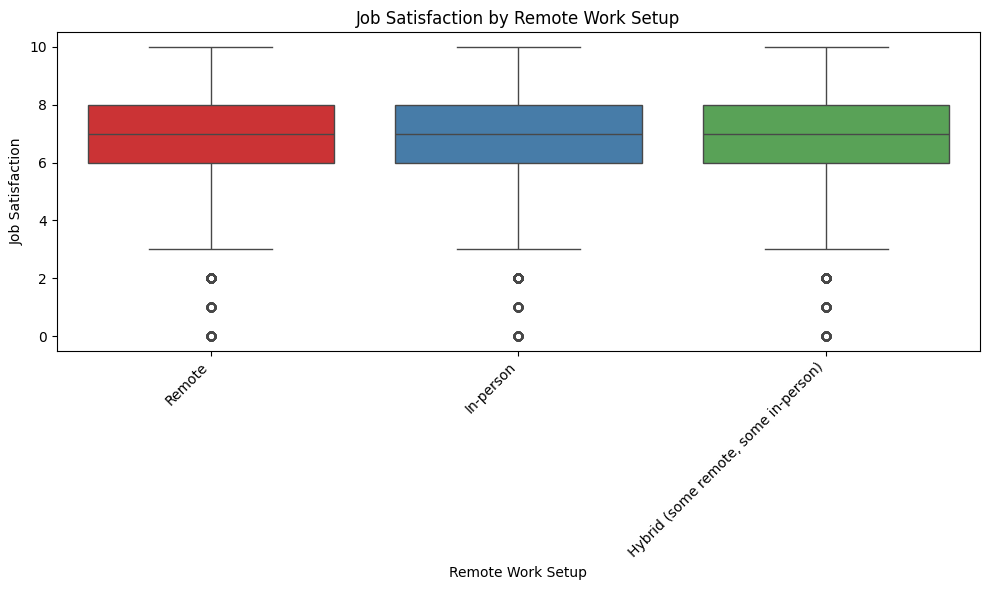

In [14]:
# Plotting Job Satisfaction by Remote Work setup using box plot
# Limiting to top categories in RemoteWork for better readability
top_remotework_categories = data['RemoteWork'].value_counts().nlargest(5).index
filtered_data_remotework = data[data['RemoteWork'].isin(top_remotework_categories)]

# Plotting Job Satisfaction for top Remote Work categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data_remotework, x='RemoteWork', y='JobSat', palette='Set1')
plt.title('Job Satisfaction by Remote Work Setup')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Remote Work Setup')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\606726016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=pd.cut(data['WorkExp'], bins=[0, 5, 10, 15, 20, 25, 50]), y='JobSat', palette='coolwarm')


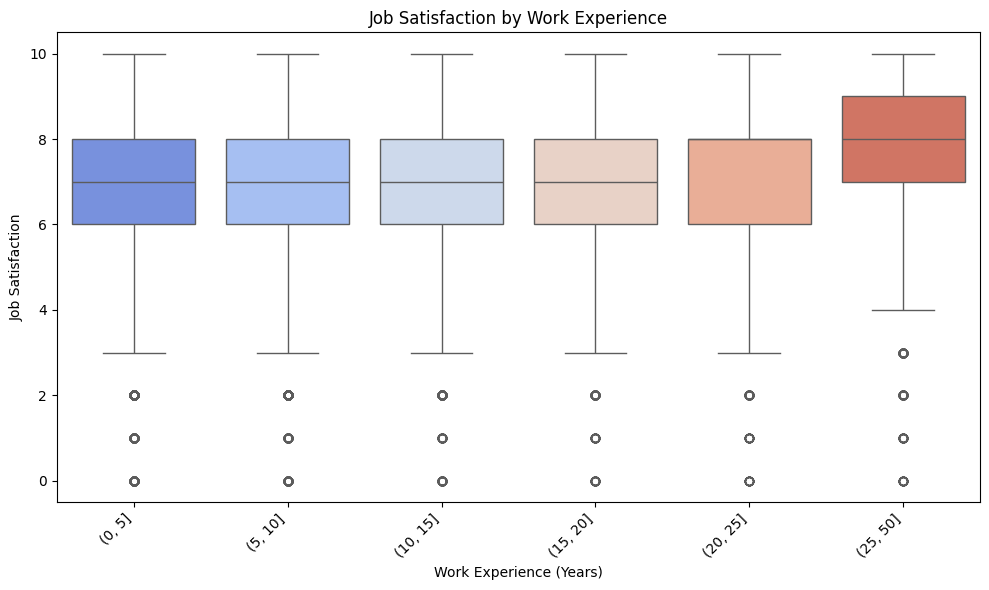

In [15]:
# Plotting Job Satisfaction by Work Experience (WorkExp) using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=pd.cut(data['WorkExp'], bins=[0, 5, 10, 15, 20, 25, 50]), y='JobSat', palette='coolwarm')
plt.title('Job Satisfaction by Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\2930307389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='WorkExp', y='JobSat', palette='Set2')


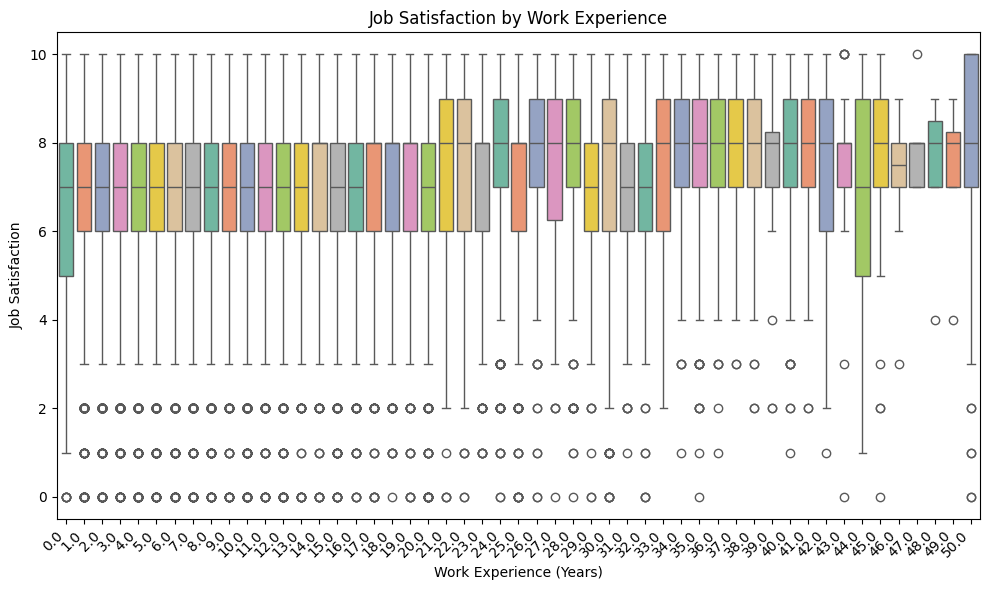

In [16]:
# Plotting Job Satisfaction by Work Experience (WorkExp) using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='WorkExp', y='JobSat', palette='Set2')
plt.title('Job Satisfaction by Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\4201708299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age', y='JobSat', palette='Set3')


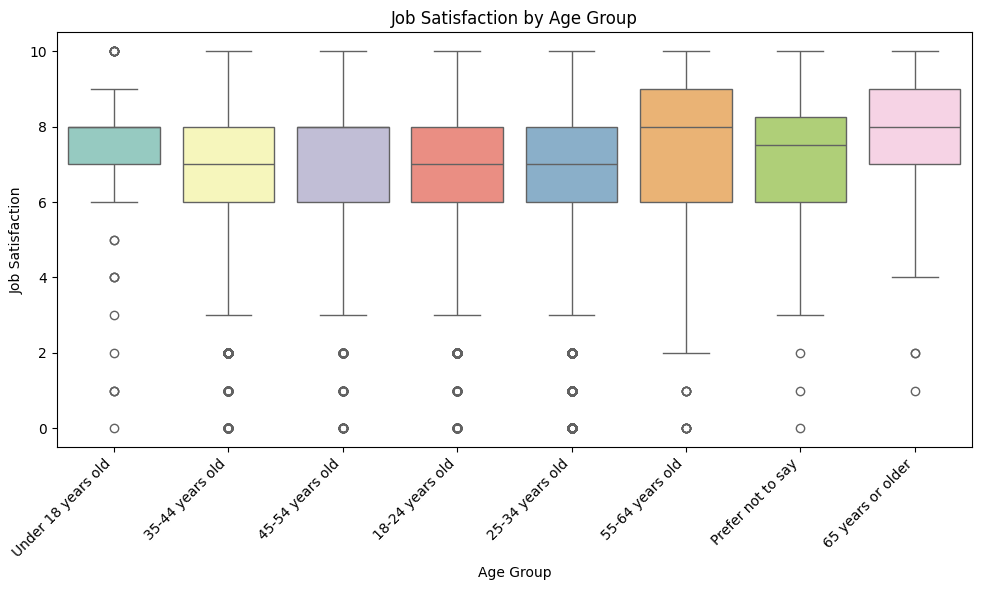

In [17]:
# Plotting Job Satisfaction by Age using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age', y='JobSat', palette='Set3')
plt.title('Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\1420576053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='RemoteWork', y='JobSat', palette='Set2')


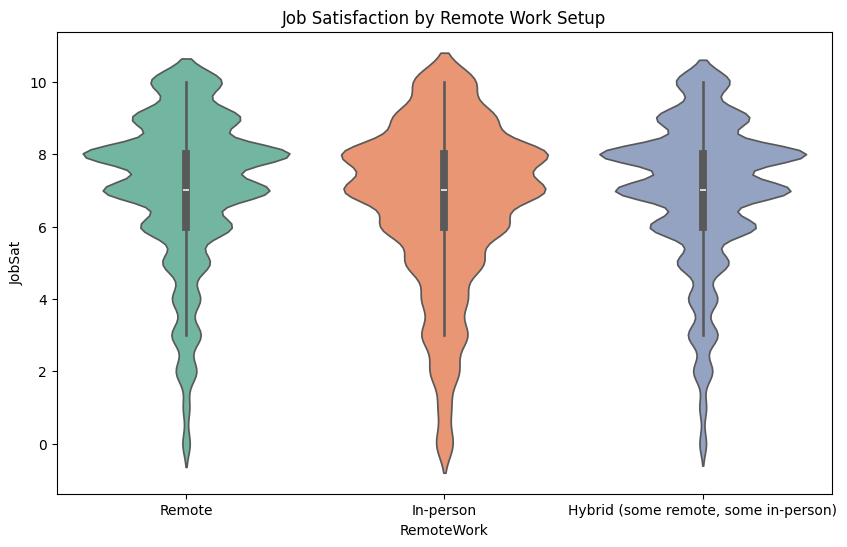

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='RemoteWork', y='JobSat', palette='Set2')
plt.title('Job Satisfaction by Remote Work Setup')
plt.show()


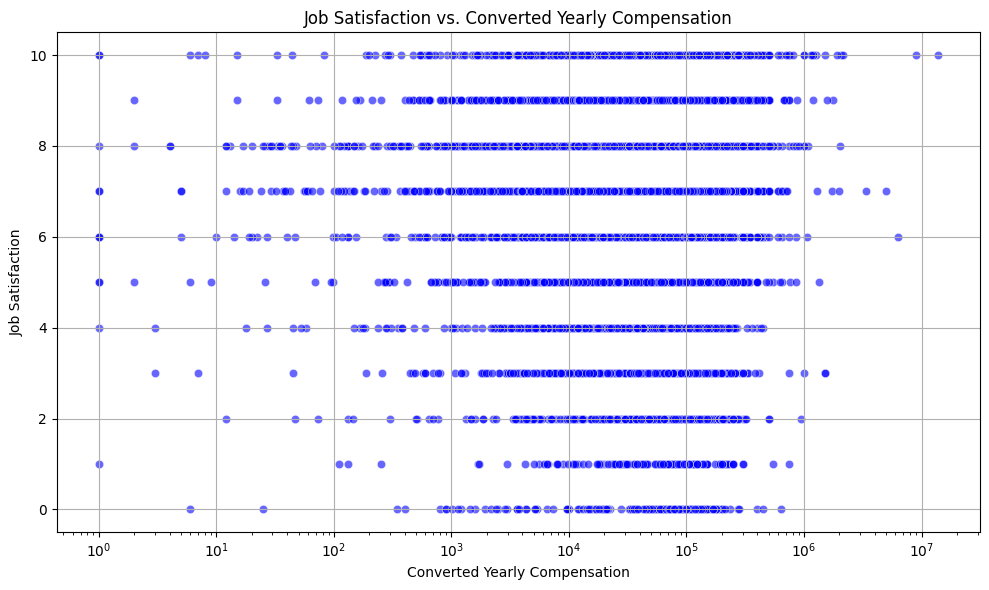

In [19]:
# Plotting Job Satisfaction vs. Converted Yearly Compensation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ConvertedCompYearly', y='JobSat', alpha=0.6, color='blue')
plt.title('Job Satisfaction vs. Converted Yearly Compensation')
plt.xlabel('Converted Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.xscale('log')  # Using log scale for better visibility of data spread
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Checking for negative or NaN values in 'ConvertedCompYearly'
negative_or_nan_values = data['ConvertedCompYearly'].isnull().sum() + (data['ConvertedCompYearly'] < 0).sum()
negative_or_nan_values


np.int64(42002)

C:\Users\msn\AppData\Local\Temp\ipykernel_27300\2832273366.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data_devtype, x='DevType', y='JobSat', palette='Set3')


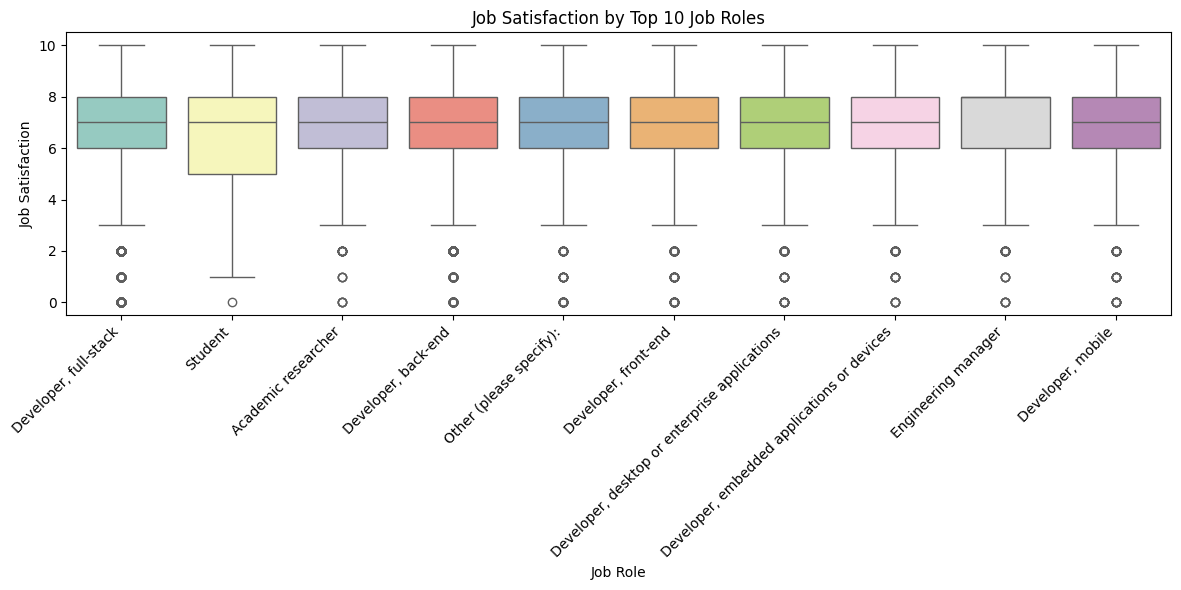

In [21]:
# Plotting Job Satisfaction by Job Role (DevType) using box plot

# Checking unique values in the DevType column to identify job roles
unique_devtypes = data['DevType'].dropna().unique()

# For clarity, let's limit the analysis to the top 10 most common job roles
top_devtype_categories = data['DevType'].value_counts().nlargest(10).index
filtered_data_devtype = data[data['DevType'].isin(top_devtype_categories)]

# Plotting Job Satisfaction for top 10 job roles
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data_devtype, x='DevType', y='JobSat', palette='Set3')
plt.title('Job Satisfaction by Top 10 Job Roles')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Role')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


In [22]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Drop rows where the target variable is NaN
valid_data = data.dropna(subset=['JobSat'])
# Step 1: Identify Data Discrepancies
# Check for remaining NaN values in the features and target variable
remaining_missing_values = valid_data.isnull().sum()
print("Remaining Missing Values in Features:\n", remaining_missing_values[remaining_missing_values > 0])


Remaining Missing Values in Features:
 RemoteWork                 9
CodingActivities           8
LearnCode                 38
LearnCodeOnline         4924
TechDoc                 8079
                       ...  
JobSatPoints_10          112
JobSatPoints_11          117
SurveyLength             406
SurveyEase               374
ConvertedCompYearly    13051
Length: 103, dtype: int64


In [23]:
# Display all column names in the dataset
all_columns = valid_data.columns.tolist()
all_columns


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [24]:
# Updated list of important columns based on your dataset
important_columns = [
    'ResponseId',
    'MainBranch',
    'Age',
    'Employment',
    'RemoteWork',
    'OrgSize',
    'DevType',
    'CompTotal',
    'WorkExp',
    'JobSat',
    'JobSatPoints_1',  # Keep only existing columns
    'JobSatPoints_4', 
    'JobSatPoints_5', 
    'JobSatPoints_6', 
    'JobSatPoints_7', 
    'JobSatPoints_8', 
    'JobSatPoints_9', 
    'JobSatPoints_10', 
    'JobSatPoints_11', 
    'EdLevel',
    'LearnCode'
]

# Create a new DataFrame with the selected columns
cleaned_data = data[important_columns]
cleaned_data

,ResponseId,MainBranch,Age,Employment,RemoteWork,OrgSize,DevType,CompTotal,WorkExp,JobSat,...,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,EdLevel,LearnCode
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primary/elementary school,Books / Physical media
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,NaN,"Developer, full-stack",NaN,17.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,NaN,Developer Experience,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,NaN,"Developer, full-stack",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f..."
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,NaN,"Developer, full-stack",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,2 to 9 employees,Blockchain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ..."
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,"1,000 to 4,999 employees","Developer, mobile",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f..."
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",20 to 99 employees,"Developer, back-end",NaN,5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....


In [25]:
# Remove rows with null values in the target variable
cleaned_data = cleaned_data[cleaned_data['JobSat'].notnull()]

# Split the cleaned data into features (X) and target (y)
X = cleaned_data.drop(columns=['JobSat'])  # Features
y = cleaned_data['JobSat']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in X_train
# For numerical columns, fill with mean
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    X_train[col].fillna(X_train[col].mean(), inplace=True)

# For categorical columns, fill with mode
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)

# Optionally handle missing values in X_test similarly, using statistics from X_train
for col in X_test.select_dtypes(include=['float64', 'int64']).columns:
    X_test[col].fillna(X_train[col].mean(), inplace=True)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col].fillna(X_train[col].mode()[0], inplace=True)

# Final check for missing values
print("Missing values in training set:", X_train.isnull().sum().sum())
print("Missing values in testing set:", X_test.isnull().sum().sum())


Missing values in training set: 0
Missing values in testing set: 0


C:\Users\msn\AppData\Local\Temp\ipykernel_27300\4053700061.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace=True)
C:\Users\msn\AppData\Local\Temp\ipykernel_27300\4053700061.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [26]:
X_train.shape

(23300, 20)

In [27]:
X_train.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'OrgSize', 'DevType', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'EdLevel', 'LearnCode'],
      dtype='object')

In [28]:
X_train.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,OrgSize,DevType,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,EdLevel,LearnCode
23219,23220,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",2 to 9 employees,"Developer, full-stack",5.607581e+145,8.0,100.0,0.0,100.0,100.0,100.0,50.0,80.0,80.0,100.0,Some college/university study without earning ...,On the job training;Other online resources (e....
11798,11799,I am a developer by profession,45-54 years old,"Employed, full-time",In-person,2 to 9 employees,"Developer, full-stack",1.200000e+05,28.0,10.0,0.0,5.0,35.0,35.0,10.0,0.0,5.0,0.0,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...
50743,50744,I am a developer by profession,25-34 years old,"Employed, part-time",Remote,2 to 9 employees,"Developer, full-stack",6.000000e+05,3.0,100.0,10.0,70.0,70.0,80.0,0.0,50.0,90.0,0.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f..."
62614,62615,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"1,000 to 4,999 employees","Developer, full-stack",1.610000e+05,26.0,20.0,0.0,0.0,20.0,10.0,40.0,10.0,0.0,0.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...
46636,46637,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,100 to 499 employees,"Developer, back-end",5.550000e+04,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Drop any irrelevant columns (if applicable)
cleaned_data.drop(columns=['ResponseId'], inplace=True, errors='ignore')

# Remove rows with null values in the target variable
cleaned_data = cleaned_data[cleaned_data['JobSat'].notnull()]




C:\Users\msn\AppData\Local\Temp\ipykernel_27300\2214572334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(columns=['ResponseId'], inplace=True, errors='ignore')
C:\Users\msn\AppData\Local\Temp\ipykernel_27300\2214572334.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace

Processed training feature shape: (23300, 509)
Processed testing feature shape: (5826, 509)


In [ ]:
# Define features (X) and target (y)
X = cleaned_data.drop(columns=['JobSat'])  # Features
y = cleaned_data['JobSat']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Handle missing values in X_train
# For numerical columns, fill with mean
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    X_train[col].fillna(X_train[col].mean(), inplace=True)

# For categorical columns, fill with mode
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)

# Impute missing values in X_test using statistics from X_train
for col in X_test.select_dtypes(include=['float64', 'int64']).columns:
    X_test[col].fillna(X_train[col].mean(), inplace=True)

for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col].fillna(X_train[col].mode()[0], inplace=True)



In [ ]:
# Define preprocessing steps
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessor on the training data
X_train_processed = pipeline.fit_transform(X_train)

# Transform the test data
X_test_processed = pipeline.transform(X_test)

print("Processed training feature shape:", X_train_processed.shape)
print("Processed testing feature shape:", X_test_processed.shape)

In [30]:
# Check for missing values in the raw training data
missing_values_X_train = X_train.isnull().sum()
print("Missing values in raw training data:")
print(missing_values_X_train[missing_values_X_train > 0])

# Check for missing values in the processed training data
missing_values_X_train_processed = pd.DataFrame(X_train_processed).isnull().sum()
print("Missing values in processed training data:")
print(missing_values_X_train_processed[missing_values_X_train_processed > 0])


Missing values in raw training data:
Series([], dtype: int64)
Missing values in processed training data:
Series([], dtype: int64)


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.17645039478201166
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.00      0.00      0.00        60
         2.0       0.04      0.04      0.04       163
         3.0       0.05      0.05      0.05       239
         4.0       0.06      0.05      0.06       227
         5.0       0.08      0.08      0.08       376
         6.0       0.15      0.13      0.14       797
         7.0       0.21      0.22      0.22      1264
         8.0       0.27      0.31      0.29      1446
         9.0       0.12      0.12      0.12       711
        10.0       0.12      0.11      0.12       488

    accuracy                           0.18      5826
   macro avg       0.10      0.10      0.10      5826
weighted avg       0.17      0.18      0.17      5826



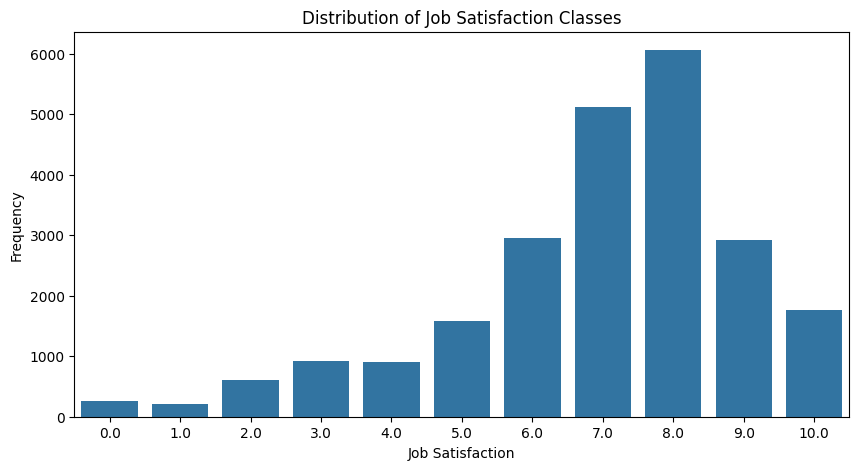

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title("Distribution of Job Satisfaction Classes")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Best parameters obtained from hyperparameter tuning
best_params = {
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# Initialize the Random Forest Classifier with the best parameters
model = RandomForestClassifier(random_state=42, **best_params)

# Fit the model on the processed training data
model.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred = model.predict(X_test_processed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.2481977342945417
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00       163
         3.0       0.00      0.00      0.00       239
         4.0       0.00      0.00      0.00       227
         5.0       0.00      0.00      0.00       376
         6.0       0.00      0.00      0.00       797
         7.0       0.00      0.00      0.00      1264
         8.0       0.25      1.00      0.40      1446
         9.0       0.00      0.00      0.00       711
        10.0       0.33      0.00      0.00       488

    accuracy                           0.25      5826
   macro avg       0.05      0.09      0.04      5826
weighted avg       0.09      0.25      0.10      5826



d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

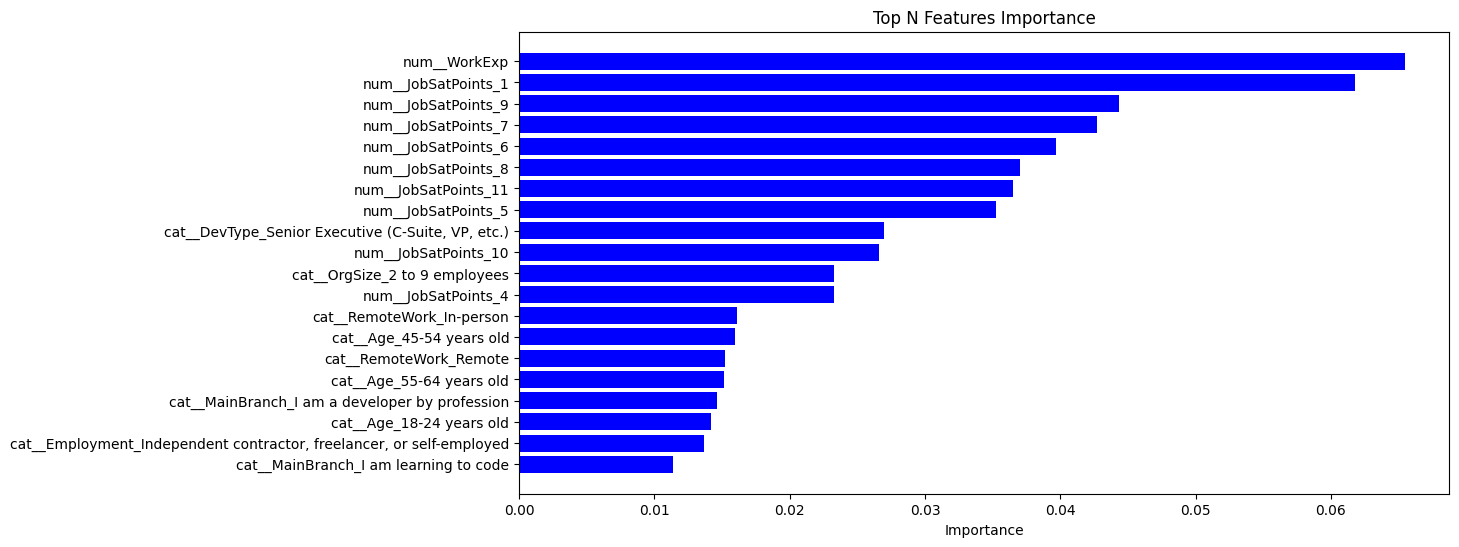

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances and feature names
importances = model.feature_importances_
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
top_n = 20  # Adjust this number as needed
top_features = feature_importances_df.head(top_n)

# Plotting top features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Top N Features Importance')
plt.gca().invert_yaxis()
plt.show()


In [36]:
# Filter the selected features
selected_features = top_features['Feature'].tolist()

# Create a mask to select the relevant columns in the processed data
selected_columns_mask = np.isin(feature_names, selected_features)

# Update X_train and X_test with selected features
X_train_selected = X_train_processed[:, selected_columns_mask]
X_test_selected = X_test_processed[:, selected_columns_mask]

# Retrain the model with selected features
model.fit(X_train_selected, y_train)

# Make predictions with the selected features
y_pred_selected = model.predict(X_test_selected)

# Evaluate the model again
accuracy_selected = accuracy_score(y_test, y_pred_selected)
report_selected = classification_report(y_test, y_pred_selected)

print(f"Accuracy with selected features: {accuracy_selected}")
print("Classification Report for selected features:\n", report_selected)


Accuracy with selected features: 0.25008582217645037
Classification Report for selected features:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00       163
         3.0       0.00      0.00      0.00       239
         4.0       0.00      0.00      0.00       227
         5.0       0.00      0.00      0.00       376
         6.0       0.00      0.00      0.00       797
         7.0       0.19      0.05      0.07      1264
         8.0       0.25      0.96      0.40      1446
         9.0       0.00      0.00      0.00       711
        10.0       0.45      0.03      0.05       488

    accuracy                           0.25      5826
   macro avg       0.08      0.09      0.05      5826
weighted avg       0.14      0.25      0.12      5826



d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)

# Fit the model on the processed training data
baseline_model.fit(X_train_processed, y_train)

# Make predictions on the processed test data
y_pred_baseline = baseline_model.predict(X_test_processed)

# Evaluate the model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
report_baseline = classification_report(y_test, y_pred_baseline)

print(f"Baseline Model Accuracy: {accuracy_baseline}")
print("Classification Report for Baseline Model:\n", report_baseline)


Baseline Model Accuracy: 0.24407826982492276
Classification Report for Baseline Model:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        55
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00       163
         3.0       0.00      0.00      0.00       239
         4.0       0.00      0.00      0.00       227
         5.0       0.11      0.01      0.02       376
         6.0       0.19      0.02      0.04       797
         7.0       0.23      0.29      0.25      1264
         8.0       0.26      0.69      0.37      1446
         9.0       0.20      0.02      0.04       711
        10.0       0.25      0.04      0.07       488

    accuracy                           0.24      5826
   macro avg       0.11      0.10      0.07      5826
weighted avg       0.19      0.24      0.17      5826



d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ReDI\Data Circle\Redi project Stackoverflow\stackproj\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera